In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [ ]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\603799.XSHG.csv',index_col=0,parse_dates=True)

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,total_turnover,high,close,open,volume,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,23049694.0,23.1326,23.0176,23.0560,995930.0,23.0100,0
2019-01-02 09:40:00,16118445.0,23.0406,22.9640,23.0176,698906.0,22.9103,1
2019-01-02 09:45:00,13180271.0,23.0560,22.9870,22.9640,570908.0,22.9563,2
2019-01-02 09:50:00,18621408.0,23.0560,23.0560,22.9870,807439.0,22.9180,3
2019-01-02 09:55:00,14496614.0,23.1863,23.0176,23.0560,625118.0,23.0023,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
idx.shape

In [ ]:
idx.head()

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

In [ ]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
m = Market(4)
Stick.mm = m
Trend.m = m
Trend.ef = ef
Pair.m = m
PairChain.m = m
CenterStrict.m = m
Signal001.m = m
Signal001.ef = ef

In [14]:
Signal001.L = m.SIG_L
Signal001()

SIG0010-0(TmS:0, 0, 0, 0)

In [15]:
Stick.L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))

In [16]:
TrendLv1 = type('TrendLv1', (Trend,), {'L':m.Lv1_L, 'ML':Stick.L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'L':m.Lv2_L, 'ML':TrendLv1.L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'L':m.Lv3_L, 'ML':TrendLv2.L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 23.055999999999997, 0))

In [17]:

Center0 = type('Center0', (CenterStrict,), {'ML': m.findList('st', 0), 'L': m.findList('center', 0), 'openL':[],  'level': 0})
Center0()
Center1 = type('Center1', (CenterStrict,), {'ML': m.findList('st', 1), 'L': m.findList('center', 1), 'openL':[],  'level': 1})
Center1()
Center2 = type('Center2', (CenterStrict,), {'ML': m.findList('st', 2), 'L': m.findList('center', 2), 'openL':[],  'level': 2})
Center2()
Center3 = type('Center3', (CenterStrict,), {'ML': m.findList('st', 3), 'L': m.findList('center', 3), 'openL':[],  'level': 3})
Center3()

Center3(0, 1, 0, 0)

In [18]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regEvent()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regEvent()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regEvent()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [19]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
   [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend2(0, 0, Point(0.0, 23.055999999999997, 0))],
   [Trend3(0, 0, Point(0.0, 23.055999999999997, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x1761deb8>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[], [], [], [], []],
  'center': [[Center0(0, 1, 0, 0)],
   [Center1(0, 1, 0, 0)],
   [Center2(0, 1, 0, 0)],
   [Center3(0, 1, 0, 0)],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 23.055999999999997, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x1761deb8>],
 'MPLv0_L': [],
 'PT01Lv0_L': [],
 'CLv0_L': [Center0(0, 1, 0, 0)],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 23.055999999999997, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 '

In [20]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'distr',
     'updateAll'],
    'obj_p': ['m.Lv1_L[-1]',
     'm.PCLv0_L[0]',
     'Center0',
     'm.PLv0_L[-1]',
     'm.SIG_L[0]'],
    'param': ['', '', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'distr',
     'newCenter'],
    'obj_p': ['m.Lv2_L[-1]',
     'm.PCLv1_L[0]',
     'Center1',
     'm.PLv1_L[-1]',
     'm.CLv0_L[0]'],
    'param': ['', '', '', '', 'obj="st", level=1, i=-1']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'

In [21]:
Position.m = m
Position.L = m.position

In [22]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:5.0,[[<frame.Event object at 0x00000000174BDA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9.0,[[<frame.Event object at 0x000000001761D470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Not Prepared!!!!
TmIdx:10.0,[[<frame.Event object at 0x000000001761D630>]]
(0, PairChainLv0, NEW)
TmIdx:12.0,[[<frame.Event object at 0x000000001761D860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13.0,[[<frame.Event object at 0x000000001761D320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14.0,[[<frame.Event object at 0x000000001761D400>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18.0,[[<frame.Event object at 0x000000001761D518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19.0,[[<frame.Event object at 0x000000001

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:390.0,[[<frame.Event object at 0x00000000176886A0>]]
(0, PairChainLv0, NEW)
TmIdx:393.0,[[<frame.Event object at 0x0000000017688668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[52, 53, 54, 55, 56, 57, 58, 59]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[52, 53, 54, 55, 56, 57, 58, 59, 60]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:393.0,[[<frame.Event object at 0x0000000017688518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:394.0,[[<frame.Event object at 0x0000000017688860>]]
(0, PairChainLv0, NEW)
TmIdx:404.0,[[<frame.Event object at 0x0000000017688A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[52, 53, 54, 55, 56, 57, 58, 59, 60]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (392.0, 23.1249, -1)),peak(385.0, 23.109

m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:615.0,[[<frame.Event object at 0x00000000176A0D30>]]
(1, PairChainLv1, NEW)
TmIdx:616.0,[[<frame.Event object at 0x00000000176A00F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:620.0,[[<frame.Event object at 0x00000000176A0A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:622.0,[[<frame.Event object at 0x00000000176A0B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:624.0,[[<frame.Event object at 0x00000000176A0D30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:626.0,[[<frame.Event object at 0x00000000176A0E80>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:631.0,[[<frame.Event object at 0x00000000176A0E48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:632.0,[[<frame.Event object at 0x00000000176A0E10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:633.0,[[<frame.Event object at 0x00000000176A0F28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6

TmIdx:928.0,[[<frame.Event object at 0x00000000176E1780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[131, 132, 133, 134, 135, 136, 137]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (918.0, 19.8674, 1)),peak(913.0, 21.6533, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[131, 132, 133, 134, 135, 136, 137, 138]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:929.0,[[<frame.Event object at 0x00000000176E1898>]]
(0, PairChainLv0, NEW)
TmIdx:930.0,[[<frame.Event object at 0x00000000176E1860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[131, 132, 133, 134, 135, 136, 137, 138]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[131, 132, 133, 134, 135, 136, 137, 138, 139]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1260.0,[[<frame.Event object at 0x00000000177168D0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1244.0, 24.7192, -1)),peak(1245.0, 24.6273, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46, 47]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:1261.0,[[<frame.Event object at 0x0000000017716BA8>, <frame.Event object at 0x0000000017716978>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1261.0,[[<frame.Event object at 0x0000000017716C18>]]
(1, PairChainLv1, NEW)
TmIdx:1262.0,[[<frame.Event object at 0x0000000017716C50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1266.0,[[<frame.Event

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[211, 212, 213, 214, 215, 216]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1427.0,[[<frame.Event object at 0x000000001772E198>]]
(0, PairChainLv0, NEW)
TmIdx:1429.0,[[<frame.Event object at 0x000000001772E390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[211, 212, 213, 214, 215, 216]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[211, 212, 213, 214, 215, 216, 217]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1429.0,[[<frame.Event object at 0x000000001772E2B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1430.0,[[<frame.Event object at 0x000000001772E630>]]
(0, PairChainLv0, NEW)
TmIdx:1431.0,[[<frame.Event object at 0x000000001772E6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1708.0,[[<frame.Event object at 0x000000001776D1D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1709.0,[[<frame.Event object at 0x000000001776D780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1710.0,[[<frame.Event object at 0x000000001776D748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1711.0,[[<frame.Event object at 0x000000001776D828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1712.0,[[<frame.Event object at 0x000000001776D898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1714.0,[[<frame.Event object at 0x000000001776D908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1715.0,[[<frame.Event object at 0x000000001776D588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1716.0,[[<frame.Event object at 0x000000001776D9B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1719.0,[[<frame.Event object at 0x000000001776DB38>]]
(0, Stick, NEW)
m.Lv1_L

m.SIG_L[0].updateAll()
TmIdx:1894.0,[[<frame.Event object at 0x0000000017783278>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[66, 67, 68, 69]
Lv2.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[69, 70]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:1894.0,[[<frame.Event object at 0x0000000017783860>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[10, 11, 12, 13, 14, 15, 16]
TrendLv3.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (1848.0, 30.7362, -1)),peak(1669.0, 31.6636, -1),drt:1
Lv3.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[10, 11, 12, 13, 14, 15, 16, 17]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:1895.0,[[<frame.Event object at 0x0000000017783B00>]]
(0, PairChainLv0, NEW)
TmIdx:1895.0,[[<frame.Event

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2145.0,[[<frame.Event object at 0x00000000177B2FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2146.0,[[<frame.Event object at 0x00000000177B2E48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2147.0,[[<frame.Event object at 0x00000000177BB128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2148.0,[[<frame.Event object at 0x00000000177B2F28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2149.0,[[<frame.Event object at 0x00000000177BB048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2150.0,[[<frame.Event object at 0x00000000177BB198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2151.0,[[<frame.Event object at 0x00000000177BB278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2152.0,[[<frame.Event object at 0x00000000177BB080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2153.0,[[<frame.Event object at 0x00000000177BB160>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].upda

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2437.0,[[<frame.Event object at 0x00000000177F5CC0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2438.0,[[<frame.Event object at 0x00000000177F5EB8>]]
(0, PairChainLv0, NEW)
TmIdx:2439.0,[[<frame.Event object at 0x00000000177F5F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2435.0, 30.0463, 1)),peak(2423.0, 29.893, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2440.0,[[<frame.Event object at 0x00000000177F5CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2441.0,[[<frame.Event object at 0x00000

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2650.0,[[<frame.Event object at 0x0000000017817198>]]
(0, PairChainLv0, NEW)
TmIdx:2652.0,[[<frame.Event object at 0x00000000178172B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2648.0, 28.0228, 1)),peak(2635.0, 28.59, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2653.0,[[<frame.Event object at 0x0000000017817128>]]
(0, PairChainLv0, NEW)
TmIdx:2655.0,[[<frame.Event object at 0x0000000017817390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[413, 414, 

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:2954.0,[[<frame.Event object at 0x000000001784DD30>]]
(0, PairChainLv0, NEW)
TmIdx:2954.0,[[<frame.Event object at 0x000000001784DDA0>]]
(1, PairChainLv1, NEW)
TmIdx:2955.0,[[<frame.Event object at 0x000000001784DB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2956.0,[[<frame.Event object at 0x000000001784D6A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2957.0,[[<frame.Event object at 0x000000001784DDD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2958.0,[[<frame.Event object at 0x000000001784DD30>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2963.0,[[<frame.Event object at 0x000000001784DEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[475, 476]
Lv1.upd1st():case1, status:1, mp:[475, 476, 477],pp:1
Lv1.produceNewTrend:case1, mp=[476, 477]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[476, 477]
m.PCLv0_L[0].upda

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3589.0, 28.5133, -1)),peak(3553.0, 28.7969, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508, 509]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3600.0,[[<frame.Event object at 0x000000001786DDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508, 509]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3601.0,[[<frame.Event object at 0x000000001786DF98>]]
(0, PairChainLv0, NEW)
TmIdx:3605.0,[[<frame.Event object at 0

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:3968.0,[[<frame.Event object at 0x00000000178B8550>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3969.0,[[<frame.Event object at 0x00000000178B87F0>]]
(0, PairChainLv0, NEW)
TmIdx:3973.0,[[<frame.Event object at 0x00000000178B8898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[562, 563, 564, 565]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[562, 563, 564, 565, 566]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3973.0,[[<frame.Event object at 0x00000000178B8550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3981.0,[[<frame.Event object at 0x00000000178B8B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[562, 563, 564, 565, 566]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(d

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[585, 586, 587, 588, 589]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4120.0,[[<frame.Event object at 0x00000000178CE908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4121.0,[[<frame.Event object at 0x00000000178CE978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4122.0,[[<frame.Event object at 0x00000000178CE828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4123.0,[[<frame.Event object at 0x00000000178CEA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4125.0,[[<frame.Event object at 0x00000000178CEB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4126.0,[[<frame.Event object at 0x00000000178CEA58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4130.0,[[<frame.Event object at 0x00000000178CEDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[585, 586,

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4295.0,[[<frame.Event object at 0x00000000178F6940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4296.0,[[<frame.Event object at 0x00000000178F6E48>]]
(0, PairChainLv0, NEW)
TmIdx:4301.0,[[<frame.Event object at 0x00000000178F6F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[610, 611, 612, 613, 614]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4293.0, 20.4269, -1)),peak(4289.0, 20.3349, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[610, 611, 612, 613, 614, 615]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4302.0,[[<frame.Event object at 0x00000000179020B8>]]
(0, PairChainLv0, NEW)
TmIdx:4303.0,[[<frame.Event object at 0x00000000178F6EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4305.0,[

m.SIG_L[0].updateAll()
TmIdx:4544.0,[[<frame.Event object at 0x0000000017922BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4541.0, 20.7182, -1)),peak(4513.0, 20.7488, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4548.0,[[<frame.Event object at 0x0000000017922D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4787.0, 21.0094, 1)),peak(4788.0, 21.1551, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4789.0, 21.1627, -1)),peak(4787.0, 21.0094, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4800.0, 20.6952, 1)),peak(4787.0, 21.0094, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[699, 700, 701, 702]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4803.0,[[<frame.Event object at 0x000000001795A748>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (4785.0, 21.1781, -1)),peak(4708.0, 22.5271, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[126, 127, 128, 129, 130, 131, 132

m.SIG_L[0].updateAll()
TmIdx:4979.0,[[<frame.Event object at 0x0000000017970C18>]]
(0, PairChainLv0, NEW)
TmIdx:4984.0,[[<frame.Event object at 0x0000000017970EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[720, 721, 722, 723, 724, 725, 726, 727]
Lv1.upd1st():case1, status:1, mp:[720, 721, 722, 723, 724, 725, 726, 727, 728],pp:5
Lv1.produceNewTrend:case1, mp=[725, 726, 727, 728]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4967.0, 20.4269, 1)),peak(4968.0, 20.5342, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4971.0, 20.5265, -1)),peak(4967.0, 20.4269, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4976.0, 20.3349, 1)),peak(4967.0, 20.4269, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[725, 726, 727, 728]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:5287.0,[[<frame.Event object at 0x00000000179B81D0>]]
(0, PairChainLv0, NEW)
TmIdx:5287.0,[[<frame.Event object at 0x00000000179ABF98>]]
(1, PairChainLv1, NEW)
TmIdx:5294.0,[[<frame.Event object at 0x00000000179B8278>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[774, 775, 776, 777]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[774, 775, 776, 777, 778]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5294.0,[[<frame.Event object at 0x00000000179B80B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5297.0,[[<frame.Event object at 0x00000000179B8470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[774, 775, 776, 777, 778]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5290.0, 21.23, -1)),peak(5280.0, 21.51, -1),drt:1
Lv1.update2(): 

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5565.0,[[<frame.Event object at 0x00000000179D98D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5566.0,[[<frame.Event object at 0x00000000179D9C50>]]
(0, PairChainLv0, NEW)
TmIdx:5571.0,[[<frame.Event object at 0x00000000179D9CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[811, 812, 813, 814, 815]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5562.0, 21.16, 1)),peak(5548.0, 21.16, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[811, 812, 813, 814, 815, 816]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5572.0,[[<frame.Event object at 0x00000000179D9BE0>]]
(0, PairChainLv0, NEW)
TmIdx:5574.0,[[<frame.Event object at 0x00000000179D9DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[811, 812, 813,

m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[162, 163, 164, 165, 166, 167, 168, 169, 170, 171]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:5809.0,[[<frame.Event object at 0x0000000017A06630>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5810.0,[[<frame.Event object at 0x0000000017A067B8>]]
(0, PairChainLv0, NEW)
TmIdx:5810.0,[[<frame.Event object at 0x0000000017A069E8>]]
(1, PairChainLv1, NEW)
TmIdx:5815.0,[[<frame.Event object at 0x0000000017A06898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5818.0,[[<frame.Event object at 0x0000000017A066A0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5820.0,[[<frame.Event object at 0x0000000017A06A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, t

m.SIG_L[0].updateAll()
TmIdx:6111.0,[[<frame.Event object at 0x0000000017A3AD30>]]
(0, PairChainLv0, NEW)
TmIdx:6112.0,[[<frame.Event object at 0x0000000017A3AF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[892, 893, 894, 895, 896, 897]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[892, 893, 894, 895, 896, 897, 898]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6112.0,[[<frame.Event object at 0x0000000017A3AE80>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6114.0,[[<frame.Event object at 0x0000000017A3ADA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6116.0,[[<frame.Event object at 0x0000000017A3ADD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6118.0,[[<frame.Event object at 0x0000000017A46080>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6125.0,[[<frame.Event object at 0x0000000017A46278>]]
(0, Stick, 

m.SIG_L[0].updateAll()
TmIdx:6350.0,[[<frame.Event object at 0x0000000017A61EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[919, 920, 921, 922, 923, 924, 925, 926]
Lv1.upd1st():case1, status:1, mp:[919, 920, 921, 922, 923, 924, 925, 926, 927],pp:5
Lv1.produceNewTrend:case1, mp=[924, 925, 926, 927]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6340.0, 21.43, -1)),peak(6341.0, 21.34, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6342.0, 21.33, 1)),peak(6340.0, 21.43, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6344.0, 21.41, -1)),peak(6340.0, 21.43, -1),drt:1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[924, 925, 926, 927]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6350.0,[[<frame.Event object at 0x0000000017A61E10>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0

m.PCLv0_L[0].updateLastSt()
TmIdx:6521.0,[[<frame.Event object at 0x0000000017A79898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6528.0,[[<frame.Event object at 0x0000000017A84198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6528.0,[[<frame.Event object at 0x0000000017A79EF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6529.0,[[<frame.Event object at 0x0000000017A84390>]]
(0, PairChainLv0, NEW)
TmIdx:6532.0,[[<frame.Event object at 0x0000000017A84438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[

TmIdx:6890.0,[[<frame.Event object at 0x0000000017AC4B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1001, 1002, 1003, 1004, 1005]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6886.0, 23.74, 1)),peak(6873.0, 23.74, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6891.0,[[<frame.Event object at 0x0000000017AC4518>]]
(0, PairChainLv0, NEW)
TmIdx:6894.0,[[<frame.Event object at 0x0000000017AC4C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1001, 1002, 1003, 1004, 1005, 1006, 1007]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6895.0,[[<frame.Event object at 0

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7092.0,[[<frame.Event object at 0x0000000017ADACC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7089.0, 26.62, 1)),peak(7057.0, 26.38, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7097.0,[[<frame.Event object at 0x0000000017ADAE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033]
m

(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[204, 205, 206, 207, 208, 209, 210, 211, 212]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (7228.0, 27.58, -1)),peak(7028.0, 28.16, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[204, 205, 206, 207, 208, 209, 210, 211, 212, 213]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7254.0,[[<frame.Event object at 0x0000000017AF9278>]]
(0, PairChainLv0, NEW)
TmIdx:7255.0,[[<frame.Event object at 0x0000000017AF9320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1057, 1058, 1059, 1060]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1057, 1058, 1059, 1060, 1061]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7255.0,[[<frame.Event object at 0x0000000017AF1F98>]]
(1, TrendLv1, LV

m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:7369.0,[[<frame.Event object at 0x0000000017B0D9B0>]]
(2, PairChainLv2, NEW)
TmIdx:7380.0,[[<frame.Event object at 0x0000000017B0D9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1082, 1083, 1084, 1085, 1086]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7380.0,[[<frame.Event object at 0x0000000017B0D710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7381.0,[[<frame.Event object at 0x0000000017B0DEB8>]]
(0, PairChainLv0, NEW)
TmIdx:7385.0,[[<frame.Event object at 0x0000000017B0DF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1082, 1083, 1084, 1085, 1086]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7378.0, 26.05, -1)),peak(7364.0, 25.95, -1),drt:1
T

TmIdx:7605.0,[[<frame.Event object at 0x0000000017B2C198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7609.0,[[<frame.Event object at 0x0000000017B2CA20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7604.0, 24.18, 1)),peak(7593.0, 24.08, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7610.0,[[<frame.Event object at 0x0000000017B2CB70>]]
(0, PairChainLv0, NEW)
TmIdx:7614.0,[[<frame.Event object at 0x0000000017B2CBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118]
Lv1.upd1st():case1, status:1, mp:[1111, 1112, 1113, 1114, 1115, 1116, 1117, 11

m.SIG_L[0].updateAll()
TmIdx:7779.0,[[<frame.Event object at 0x0000000017B48C50>]]
(0, PairChainLv0, NEW)
TmIdx:7780.0,[[<frame.Event object at 0x0000000017B48C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1144, 1145]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7780.0,[[<frame.Event object at 0x0000000017B48AC8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[225, 226, 227, 228, 229]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (7773.0, 24.37, 1)),peak(7707.0, 24.44, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[225, 226, 227, 228, 229, 230]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st"

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[232, 233, 234, 235, 236, 237]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[232, 233, 234, 235, 236, 237, 238]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:7928.0,[[<frame.Event object at 0x0000000017B6B048>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7929.0,[[<frame.Event object at 0x0000000017B62F28>, <frame.Event object at 0x0000000017B62FD0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7929.0,[[<frame.Event object at 0x0000000017B6B128>]]
(1, PairChainLv1, NEW)
TmIdx:7930.0,[[<frame.Event object at 0x0000000017B62EF0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7934.0,[[<frame.Event object at 0x0000000017B6B048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1168, 1169, 1170, 1171]
Lv1.update2(): flag:1, tre

m.SIG_L[0].updateAll()
TmIdx:8096.0,[[<frame.Event object at 0x0000000017B8B2B0>]]
(0, PairChainLv0, NEW)
TmIdx:8104.0,[[<frame.Event object at 0x0000000017B8B240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1194, 1195, 1196, 1197, 1198]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8092.0, 26.68, -1)),peak(8078.0, 26.36, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1194, 1195, 1196, 1197, 1198, 1199]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8105.0,[[<frame.Event object at 0x0000000017B8B438>]]
(0, PairChainLv0, NEW)
TmIdx:8108.0,[[<frame.Event object at 0x0000000017B8B470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1194, 1195, 1196, 1197, 1198, 1199]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1194, 1195, 1196

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8244.0, 27.57, 1)),peak(8226.0, 27.63, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1221, 1222, 1223, 1224, 1225, 1226]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8258.0,[[<frame.Event object at 0x0000000017B98CF8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[240, 241, 242, 243, 244, 245, 246, 247, 248]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8223.0, 27.88, -1)),peak(8114.0, 28.77, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[240, 241, 242, 243, 244, 245, 246, 247, 248, 249]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:8263.0,[[<frame.Event object at 0x0000000017BA53C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_b

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8437.0,[[<frame.Event object at 0x0000000017BC2588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251]
Lv1.upd1st():case1, status:1, mp:[1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252],pp:5
Lv1.produceNewTrend:case1, mp=[1249, 1250, 1251, 1252]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8414.0, 26.94, 1)),peak(8416.0, 27.09, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8424.0, 27.12, -1)),peak(8414.0, 26.94, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8432.0, 26.61, 1)),peak(8414.0, 26.94, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1249, 1250, 1251, 1252]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].upda

m.SIG_L[0].updateAll()
TmIdx:8532.0,[[<frame.Event object at 0x0000000017BDA2E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269, 1270]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8532.0,[[<frame.Event object at 0x0000000017BDA198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8538.0,[[<frame.Event object at 0x0000000017BDA4E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269, 1270]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8531.0, 26.86, -1)),peak(8517.0, 27.25, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271]
m.PCLv0_L[0].update2()
Center0.updateAll(

m.SIG_L[0].updateAll()
TmIdx:8901.0,[[<frame.Event object at 0x0000000017C23748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8904.0,[[<frame.Event object at 0x0000000017C23518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8908.0,[[<frame.Event object at 0x0000000017C23898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325]
Lv1.upd1st():case1, status:1, mp:[1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326],pp:9
Lv1.produceNewTrend:case1, mp=[1323, 1324, 1325, 1326]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8887.0, 25.69, 1)),peak(8884.0, 26.03, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8891.0, 25.98, -1)),peak(8887.0, 25.69, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8901.0, 25.6, 1)),peak(8887.0, 25.69, 1),drt:-1
TrendLv1.u

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282]
Lv2.upd1st():case1, status:1, mp:[267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283],pp:13
Lv2.produceNewTrend:case1, mp=[280, 281, 282, 283]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (8993.0, 25.45, -1)),peak(9030.0, 24.78, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (9025.0, 24.5, 1)),peak(8993.0, 25.45, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (9053.0, 25.49, -1)),peak(8993.0, 25.45, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[280, 281, 282, 283]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9092.0,[[<frame.Event object at 0x0000000017C42240>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9270.0,[[<frame.Event object at 0x0000000017C51F60>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[283, 284, 285, 286, 287, 288]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[283, 284, 285, 286, 287, 288, 289]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:9270.0,[[<frame.Event object at 0x0000000017C57358>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9271.0,[[<frame.Event object at 0x0000000017C57550>]]
(0, PairChainLv0, NEW)
TmIdx:9271.0,[[<frame.Event object at 0x0000000017C57668>]]
(1, PairChainLv1, NEW)
TmIdx:9277.0,[[<frame.Event object at 0x0000000017C577F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1373, 1374]
Lv1.update1st:status=0,mp:3,(9243.0, 23.53, -1),(9249.0, 23.45, -1),(9277.0, 24.0, 1),[StdK(9256.0,

(3, TrendLv3, LVUPD)

TmIdx:9458.0,[[<frame.Event object at 0x0000000017C73278>]]
(0, PairChainLv0, NEW)
TmIdx:9458.0,[[<frame.Event object at 0x0000000017C73470>]]
(1, PairChainLv1, NEW)
TmIdx:9458.0,[[<frame.Event object at 0x0000000017C73588>]]
(2, PairChainLv2, NEW)
TmIdx:9464.0,[[<frame.Event object at 0x0000000017C73320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1392, 1393, 1394, 1395]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1392, 1393, 1394, 1395, 1396]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9464.0,[[<frame.Event object at 0x0000000017C73358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9465.0,[[<frame.Event object at 0x0000000017C737F0>, <frame.Event object at 0x0000000017C73518>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9466.0,[[<frame.Event object at 0x0000000017C735F8>]]
(0, Stick, PE

m.PCLv0_L[0].updateLastSt()
TmIdx:9840.0,[[<frame.Event object at 0x0000000017CB5908>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9842.0,[[<frame.Event object at 0x0000000017CB57B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1439, 1440, 1441, 1442, 1443]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9842.0,[[<frame.Event object at 0x0000000017CB5358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9843.0,[[<frame.Event object at 0x0000000017CB5B38>]]
(0, PairChainLv0, NEW)
TmIdx:9847.0,[[<frame.Event object at 0x0000000017CB5C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442, 1443]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9841.0, 26.0, 1)),peak(9840.0, 26.0

TmIdx:10027.0,[[<frame.Event object at 0x0000000017CC8EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10029.0,[[<frame.Event object at 0x0000000017CC8748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10032.0,[[<frame.Event object at 0x0000000017CC8FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1462, 1463, 1464, 1465, 1466, 1467]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1462, 1463, 1464, 1465, 1466, 1467, 1468]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10032.0,[[<frame.Event object at 0x0000000017CC8F28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10033.0,[[<frame.Event object at 0x0000000017CC7198>, <frame.Event object at 0x0000000017CC8CC0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10034.0,[[<frame.Event object at 0x0000000017CC8240>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].u

TmIdx:10344.0,[[<frame.Event object at 0x0000000017D16400>]]
(0, PairChainLv0, NEW)
TmIdx:10346.0,[[<frame.Event object at 0x0000000017D16470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1515, 1516, 1517, 1518, 1519, 1520, 1521]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10342.0, 27.86, 1)),peak(10323.0, 27.57, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10352.0,[[<frame.Event object at 0x0000000017D16550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522]
Lv1.upd1st():case1, status:1, mp:[1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523],pp:5
Lv1.produceNewTrend:case1, mp=[1520, 1521, 1522, 1523]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_st

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1542, 1543, 1544, 1545]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1542, 1543, 1544, 1545, 1546]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10481.0,[[<frame.Event object at 0x0000000017D2D128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10482.0,[[<frame.Event object at 0x0000000017D2D518>]]
(0, PairChainLv0, NEW)
TmIdx:10484.0,[[<frame.Event object at 0x0000000017D2D5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1542, 1543, 1544, 1545, 1546]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10480.0, 28.68, -1)),peak(10476.0, 28.66, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1542, 1543, 1544, 1545, 1546, 1547]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1

Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1573, 1574]
Lv1.update1st:status=0,mp:3,(10612.0, 30.85, -1),(10624.0, 30.28, -1),(10633.0, 30.08, 1),[StdK(10625.0, 30.25, 30.0, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10630.0, 30.25, -1)),peak(10624.0, 30.28, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1573, 1574, 1575]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10633.0,[[<frame.Event object at 0x0000000017D4D860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10634.0,[[<frame.Event object at 0x0000000017D4DA58>, <frame.Event object at 0x0000000017D4D5C0>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10636.0,[[<frame.Event object at 0x0000000017D4DA20>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10637.0,[[<frame.Event object at 0x0000000017D4D6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1592, 1593, 1594, 1595, 1596, 1597]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1592, 1593, 1594, 1595, 1596, 1597, 1598]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10773.0,[[<frame.Event object at 0x0000000017D64438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10774.0,[[<frame.Event object at 0x0000000017D64748>]]
(0, PairChainLv0, NEW)
TmIdx:10776.0,[[<frame.Event object at 0x0000000017D647B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1592, 1593, 1594, 1595, 1596, 1597, 1598]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (10772.0, 31.7, -1)),peak(10765.0, 31.98, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599]
m.PCLv0_L[0].update2()
Center0.update

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10928.0, 31.76, 1)),peak(10904.0, 31.84, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1619, 1620, 1621, 1622]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10931.0,[[<frame.Event object at 0x0000000017D82278>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[332, 333, 334, 335, 336]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (10898.0, 32.38, -1)),peak(10834.0, 32.79, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[332, 333, 334, 335, 336, 337]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:10932.0,[[<frame.Event object at 0x0000000017D827F0>]]
(0, PairChainLv0, NEW)
TmIdx:10932.0,[[<frame.Event object at 0x0000000017D825C0>]]
(1, PairChainLv

TmIdx:11094.0,[[<frame.Event object at 0x0000000017D9D588>]]
(0, PairChainLv0, NEW)
TmIdx:11094.0,[[<frame.Event object at 0x0000000017D9D3C8>]]
(1, PairChainLv1, NEW)
TmIdx:11095.0,[[<frame.Event object at 0x0000000017D9D6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1644, 1645]
Lv1.update1st:status=0,mp:3,(11085.0, 30.05, 1),(11090.0, 30.41, 1),(11095.0, 30.58, -1),[StdK(11089.0, 30.94, 30.16, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11091.0, 30.16, 1)),peak(11090.0, 30.41, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1644, 1645, 1646]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11095.0,[[<frame.Event object at 0x0000000017D9D240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11096.0,[[<frame.Event object at 0x0000000017D9D940>]]
(0, PairChainLv0, NEW)
TmIdx:11097.0,[[<frame.Event object at 0x0000000

TmIdx:11264.0,[[<frame.Event object at 0x0000000017DBF6D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11265.0,[[<frame.Event object at 0x0000000017DBF518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11267.0,[[<frame.Event object at 0x0000000017DBF828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11271.0,[[<frame.Event object at 0x0000000017DBFA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1667, 1668, 1669, 1670, 1671, 1672]
Lv1.upd1st():case1, status:1, mp:[1667, 1668, 1669, 1670, 1671, 1672, 1673],pp:5
Lv1.produceNewTrend:case1, mp=[1672, 1673]
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1672, 1673]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11271.0,[[<frame.Event object at 0x0000000017DBF908>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[338, 339, 340, 341, 342, 34

Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[343, 344, 345, 346, 347, 348, 349, 350]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[343, 344, 345, 346, 347, 348, 349, 350, 351]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:11434.0,[[<frame.Event object at 0x0000000017DDEB38>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11435.0,[[<frame.Event object at 0x0000000017DDED30>]]
(0, PairChainLv0, NEW)
TmIdx:11436.0,[[<frame.Event object at 0x0000000017DDEDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1695, 1696, 1697, 1698]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1698, 1699]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11436.0,[[<frame.Event object at 0x0000000017DDEB38>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11573.0,[[<frame.Event object at 0x0000000017DFADA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11574.0,[[<frame.Event object at 0x0000000017DFACC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11578.0,[[<frame.Event object at 0x0000000017DD9080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11573.0, 38.33, -1)),peak(11574.0, 38.02, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11579.0,[[<frame.Event object at 0x0000000017DD9240>]]
(0, PairChainLv0, NEW)
TmIdx:11584.0,[[<frame.Event object at 0x0000000017DD9208>

m.SIG_L[0].updateAll()
TmIdx:11764.0,[[<frame.Event object at 0x0000000017E23080>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11765.0,[[<frame.Event object at 0x0000000017E23390>]]
(0, PairChainLv0, NEW)
TmIdx:11767.0,[[<frame.Event object at 0x0000000017E23438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11763.0, 40.65, -1)),peak(11753.0, 41.28, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11768.0,[[<frame.Event object at 0x0000000017E23518>]]
(0, PairChainLv0, NEW)
TmIdx:11772.0,[[<frame.Event object at 0x0000000017E23550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: f

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11936.0,[[<frame.Event object at 0x0000000017E3A828>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783]
Lv1.upd1st():case1, status:1, mp:[1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784],pp:5
Lv1.produceNewTrend:case1, mp=[1781, 1782, 1783, 1784]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11915.0, 46.05, 1)),peak(11916.0, 46.61, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11920.0, 47.1, -1)),peak(11915.0, 46.05, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11932.0, 44.78, 1)),peak(11915.0, 46.05, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1781, 1782, 1783, 1784]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11936.0,[

Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12079.0,[[<frame.Event object at 0x0000000017E54940>]]
(0, PairChainLv0, NEW)
TmIdx:12081.0,[[<frame.Event object at 0x0000000017E549E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12082.0,[[<frame.Event object at 0x0000000017E54748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12084.0,[[<frame.Event object at 0x0000000017E54908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12086.0,[[<frame.Event object at 0x0000000017E54940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12088.0,[[<frame.Event object at 0x0000000017E54B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1806, 1807, 1808, 1809]
Lv1.update2(): f

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12219.0, 46.52, -1)),peak(12196.0, 47.0, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12228.0, 45.77, 1)),peak(12196.0, 47.0, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12230.0, 46.29, -1)),peak(12196.0, 47.0, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12232.0, 45.89, 1)),peak(12196.0, 47.0, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12242.0, 46.4, -1)),peak(12196.0, 47.0, -1),drt:1
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12250.0,[[<frame.Event object at 0x0000000017E72908>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[350, 351, 352, 353, 354, 355, 356, 357, 358, 35

m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:12387.0,[[<frame.Event object at 0x0000000017E8EE10>]]
(0, PairChainLv0, NEW)
TmIdx:12388.0,[[<frame.Event object at 0x0000000017E8EF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1859, 1860]
Lv1.update1st:status=0,mp:3,(12377.0, 45.22, -1),(12383.0, 44.86, -1),(12388.0, 44.53, 1),[StdK(12382.0, 45.38, 44.61, 1)]
Lv1.update2(): flag:1, treated.status:0,treaded.drt:1,treated.mp:[1860, 1861]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12388.0,[[<frame.Event object at 0x0000000017E8E748>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12389.0,[[<frame.Event object at 0x0000000017E98208>]]
(0, PairChainLv0, NEW)
TmIdx:12391.0,[[<frame.Event object at 0x0000000017E98240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status

(0, PairChainLv0, NEW)
TmIdx:12590.0,[[<frame.Event object at 0x0000000017EBB160>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12591.0,[[<frame.Event object at 0x0000000017EBB208>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12594.0,[[<frame.Event object at 0x0000000017EBB438>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12590.0, 47.37, -1)),peak(12591.0, 47.06, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12595.0,[[<frame.Event object at 0x0000000017EBB5F8>]]
(0, PairChainLv0, NEW)
TmIdx:12596.0,[[<frame.Event object at 0x0000000017EBB5C0>]]
(0, Stick, NEW)
m.L

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12746.0,[[<frame.Event object at 0x0000000017ED4668>]]
(0, PairChainLv0, NEW)
TmIdx:12750.0,[[<frame.Event object at 0x0000000017ED48D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913]
Lv1.upd1st():case1, status:1, mp:[1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914],pp:5
Lv1.produceNewTrend:case1, mp=[1911, 1912, 1913, 1914]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12736.0, 43.84, 1)),peak(12733.0, 44.3, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12740.0, 44.35, -1)),peak(12736.0, 43.84, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12744.0, 43.5, 1)),peak(12736.0, 43.84, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1911, 1912, 1913, 1914]
m.PCLv0_L[0].update2()
Center0.up

Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12929.0,[[<frame.Event object at 0x0000000017EEA940>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12930.0,[[<frame.Event object at 0x0000000017EEAC50>]]
(0, PairChainLv0, NEW)
TmIdx:12935.0,[[<frame.Event object at 0x0000000017EEAE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (12928.0, 54.39, 1)),peak(12915.0, 53.12, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12936.0,[[<frame.Event object at 0x0000

Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1957, 1958, 1959, 1960]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13125.0,[[<frame.Event object at 0x0000000017F06710>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404]
Lv2.upd1st():case1, status:1, mp:[397, 398, 399, 400, 401, 402, 403, 404, 405],pp:5
Lv2.produceNewTrend:case1, mp=[402, 403, 404, 405]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (13010.0, 55.39, -1)),peak(13042.0, 53.38, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (13025.0, 52.13, 1)),peak(13010.0, 55.39, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (13039.0, 53.45, -1)),peak(13010.0, 55.39, -1),drt:1
Lv2.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[402, 403, 404, 405]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].new

TmIdx:13297.0,[[<frame.Event object at 0x0000000017F2AEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13291.0, 44.89, -1)),peak(13280.0, 45.4, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13298.0,[[<frame.Event object at 0x0000000017F19080>]]
(0, PairChainLv0, NEW)
TmIdx:13299.0,[[<frame.Event object at 0x0000000017F2AE48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13303.0,[[<frame.Event object at 0x0000000017F2ADD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13306.0,[[<frame.Event object at 0x0000000017F19160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1

m.SIG_L[0].updateAll()
TmIdx:13645.0,[[<frame.Event object at 0x0000000017F67EF0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[414, 415, 416, 417, 418, 419, 420, 421]
Lv2.upd1st():case1, status:1, mp:[414, 415, 416, 417, 418, 419, 420, 421, 422],pp:5
Lv2.produceNewTrend:case1, mp=[419, 420, 421, 422]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (13590.0, 40.01, 1)),peak(13620.0, 40.29, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (13615.0, 40.82, -1)),peak(13590.0, 40.01, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (13632.0, 39.3, 1)),peak(13590.0, 40.01, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[419, 420, 421, 422]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:13645.0,[[<frame.Event object at 0x0000000017F71438>]]
(2, TrendLv2, NEW)

m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13783.0,[[<frame.Event object at 0x0000000017F88860>]]
(0, PairChainLv0, NEW)
TmIdx:13783.0,[[<frame.Event object at 0x0000000017F88978>]]
(1, PairChainLv1, NEW)
TmIdx:13785.0,[[<frame.Event object at 0x0000000017F88940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2055, 2056, 2057, 2058, 2059, 2060, 2061]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13785.0,[[<frame.Event object at 0x0000000017F395C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13789.0,[[<frame.Event object at 0x0000000017F880B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13790.0,[[<frame.Event object at 0x0000000017F88860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13794.0,[[<frame.Event object at 0x0000000017F8851

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14110.0,[[<frame.Event object at 0x0000000017FCAC50>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[430, 431, 432, 433]
Lv2.update2(): flag:2, treated.status:0,treaded.drt:-1,treated.mp:[433, 434]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14110.0,[[<frame.Event object at 0x0000000017FCAE80>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
Lv3.update2()_begin: flag:0, treated.status:1,treated.mp:[81, 82]
Lv3.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[81, 82, 83]
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:14111.0,[[<frame.Event object at 0x0000000017FCC080>]]
(0, PairChainLv0, NEW)
TmIdx:14111.0,[[<frame.Event object at 0x0000000017FCC2B0>]]
(2, PairChainLv2, NEW)
TmIdx:14113.0,[[<frame.Event object at 0x0000000017FCC128>]]
(

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14265.0,[[<frame.Event object at 0x0000000017FD99B0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[433, 434, 435, 436, 437, 438, 439]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (14240.0, 29.2, 1)),peak(14205.0, 28.9, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[433, 434, 435, 436, 437, 438, 439, 440]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14266.0,[[<frame.Event object at 0x0000000017FE1080>]]
(0, PairChainLv0, NEW)
TmIdx:14266.0,[[<frame.Event object at 0x0000000017FD9F28>]]
(1, PairChainLv1, NEW)
TmIdx:14268.0,[[<frame.Event object at 0x0000000017FE1048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2130, 2131, 2132, 2133]
Lv1.update2(): flag:1, treated.status:1,treaded

TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2151, 2152, 2153, 2154]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14418.0,[[<frame.Event object at 0x0000000017FF5DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2151, 2152, 2153, 2154]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2151, 2152, 2153, 2154, 2155]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14419.0,[[<frame.Event object at 0x0000000017FEF048>]]
(0, PairChainLv0, NEW)
TmIdx:14420.0,[[<frame.Event object at 0x0000000017FEF0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2151, 2152, 2153, 2154, 2155]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14417.0, 28.35, 1)),peak(14409.0, 28.77, 1),drt:-1
TrendLv1.updatedPeakP(st

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14574.0,[[<frame.Event object at 0x000000001800DDD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14579.0,[[<frame.Event object at 0x00000000180130B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14573.0, 30.6, 1)),peak(14546.0, 30.6, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14580.0,[[<frame.Event object at 0x0000000018013208>, <frame.Event object at 0x0000000018013240>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14581.0,[[<frame.Event object at 0x000000001800DEB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLas

TmIdx:14731.0,[[<frame.Event object at 0x0000000018034358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (14722.0, 33.06, -1)),peak(14715.0, 33.63, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14732.0,[[<frame.Event object at 0x0000000018034438>]]
(0, PairChainLv0, NEW)
TmIdx:14733.0,[[<frame.Event object at 0x0000000018034470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2

m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:14891.0,[[<frame.Event object at 0x0000000018048160>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14892.0,[[<frame.Event object at 0x0000000018048438>]]
(0, PairChainLv0, NEW)
TmIdx:14892.0,[[<frame.Event object at 0x0000000018048588>, <frame.Event object at 0x0000000018048630>]]
(1, PairChainLv1, NEW)
(1, PairChainLv1, NEW)
TmIdx:14895.0,[[<frame.Event object at 0x00000000180484E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2232, 2233, 2234, 2235]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2232, 2233, 2234, 2235, 2236]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14895.0,[[<frame.Event object at 0x0000000018048160>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14896.0,[[<frame.Event object at 0x0000000018048780>]]
(0, PairChainLv0, NEW)
TmIdx

TmIdx:15034.0,[[<frame.Event object at 0x000000001806F470>]]
(0, PairChainLv0, NEW)
TmIdx:15035.0,[[<frame.Event object at 0x000000001806F588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2257, 2258]
Lv1.update1st:status=0,mp:3,(15024.0, 34.84, -1),(15028.0, 34.3, -1),(15035.0, 34.17, 1),[StdK(15026.0, 34.46, 34.0, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15032.0, 34.46, -1)),peak(15028.0, 34.3, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2257, 2258, 2259]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15035.0,[[<frame.Event object at 0x000000001806F400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15040.0,[[<frame.Event object at 0x000000001806F390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2257, 2258, 2259]
TrendLv1.updatedPeakP(st_idx_in_ss):las

TmIdx:15200.0,[[<frame.Event object at 0x000000001808EA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2282, 2283, 2284]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15196.0, 33.15, -1)),peak(15184.0, 33.12, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2282, 2283, 2284, 2285]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15202.0,[[<frame.Event object at 0x000000001808EB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15203.0,[[<frame.Event object at 0x000000001808E2B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15204.0,[[<frame.Event object at 0x000000001808EC50>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15208.0,[[<frame.Event object at 0x000000001808ECF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.m

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15340.0,[[<frame.Event object at 0x00000000180AA7B8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[473, 474, 475, 476]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[473, 474, 475, 476, 477]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15341.0,[[<frame.Event object at 0x00000000180AABA8>]]
(0, PairChainLv0, NEW)
TmIdx:15341.0,[[<frame.Event object at 0x00000000180AAC18>]]
(1, PairChainLv1, NEW)
TmIdx:15347.0,[[<frame.Event object at 0x00000000180AAE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2311, 2312]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2311, 2312, 2313]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15348.0,[[<frame.Event object at 0x00000000180AAF28>, <fra

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15491.0,[[<frame.Event object at 0x00000000180C49E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15492.0,[[<frame.Event object at 0x00000000180C4CC0>]]
(0, PairChainLv0, NEW)
TmIdx:15494.0,[[<frame.Event object at 0x00000000180C4DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15489.0, 34.54, -1)),peak(15481.0, 34.63, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15496.0,[[<frame.Event object at 0x00000000180C4EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2334, 2335, 2336, 2337, 2338, 2339]
Lv1.update2(): flag:

TmIdx:15653.0,[[<frame.Event object at 0x00000000180E3B38>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[478, 479, 480, 481, 482, 483, 484, 485, 486]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (15627.0, 38.23, -1)),peak(15571.0, 38.15, -1),drt:1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[478, 479, 480, 481, 482, 483, 484, 485, 486, 487]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15654.0,[[<frame.Event object at 0x00000000180E9080>]]
(0, PairChainLv0, NEW)
TmIdx:15654.0,[[<frame.Event object at 0x00000000180E9160>]]
(1, PairChainLv1, NEW)
TmIdx:15657.0,[[<frame.Event object at 0x00000000180E9128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2365, 2366, 2367, 2368]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp

Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2392, 2393]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15801.0,[[<frame.Event object at 0x00000000180FF518>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[487, 488, 489, 490, 491]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (15785.0, 36.05, 1)),peak(15717.0, 35.0, 1),drt:-1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[487, 488, 489, 490, 491, 492]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:15802.0,[[<frame.Event object at 0x0000000018109198>]]
(0, PairChainLv0, NEW)
TmIdx:15803.0,[[<frame.Event object at 0x0000000018109208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2392, 2393]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2392, 2393, 2394]


m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15968.0,[[<frame.Event object at 0x00000000181272B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2411, 2412, 2413, 2414, 2415, 2416]
Lv1.upd1st():case1, status:1, mp:[2411, 2412, 2413, 2414, 2415, 2416, 2417],pp:3
Lv1.produceNewTrend:case1, mp=[2414, 2415, 2416, 2417]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15955.0, 35.62, -1)),peak(15956.0, 35.45, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (15959.0, 35.38, 1)),peak(15955.0, 35.62, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15963.0, 35.63, -1)),peak(15955.0, 35.62, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[2414, 2415, 2416, 2417]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15968.0,[[<frame.Event object at 0x000000001812

TmIdx:16131.0,[[<frame.Event object at 0x000000001813BF98>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[501, 502, 503, 504]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[501, 502, 503, 504, 505]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:16132.0,[[<frame.Event object at 0x0000000018144278>]]
(0, PairChainLv0, NEW)
TmIdx:16132.0,[[<frame.Event object at 0x0000000018144358>]]
(1, PairChainLv1, NEW)
TmIdx:16133.0,[[<frame.Event object at 0x0000000018144400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2437, 2438]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2437, 2438, 2439]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16134.0,[[<frame.Event object at 0x00000000181444E0>]]
(0, PairChainLv0, NEW)
TmIdx:16138.0,[[<frame.E

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16308.0,[[<frame.Event object at 0x00000000181583C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16313.0,[[<frame.Event object at 0x00000000181585F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16307.0, 31.5, 1)),peak(16296.0, 31.33, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Tm

TmIdx:16459.0,[[<frame.Event object at 0x00000000181792E8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16460.0,[[<frame.Event object at 0x0000000018179588>]]
(0, PairChainLv0, NEW)
TmIdx:16460.0,[[<frame.Event object at 0x0000000018179748>]]
(1, PairChainLv1, NEW)
TmIdx:16465.0,[[<frame.Event object at 0x0000000018179668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2480, 2481, 2482, 2483, 2484, 2485]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2480, 2481, 2482, 2483, 2484, 2485, 2486]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16465.0,[[<frame.Event object at 0x00000000181792E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16466.0,[[<frame.Event object at 0x0000000018179A20>]]
(0, PairChainLv0, NEW)
TmIdx:16467.0,[[<frame.Event object at 0x0000000018179908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_beg

TmIdx:16585.0,[[<frame.Event object at 0x00000000181960F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16587.0,[[<frame.Event object at 0x00000000181966A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16588.0,[[<frame.Event object at 0x0000000018196438>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16598.0,[[<frame.Event object at 0x0000000018196978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507]
Lv1.upd1st():case1, status:1, mp:[2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508],pp:5
Lv1.produceNewTrend:case1, mp=[2505, 2506, 2507, 2508]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16566.0, 34.9, 1)),peak(16559.0, 35.74, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (16574.0, 35.33, -1)),peak(16566.0, 34.9, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16587.0, 34.5, 1))

Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16740.0,[[<frame.Event object at 0x00000000181B0A58>]]
(0, PairChainLv0, NEW)
TmIdx:16743.0,[[<frame.Event object at 0x00000000181B0908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16743.0,[[<frame.Event object at 0x00000000181B0828>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16744.0,[[<frame.Event object at 0x00000000181B0BA8>]]
(0, PairChainLv0, NEW)
TmIdx:16745.0,[[<frame.Event object at 0x00000000181B0C18>]

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2555, 2556, 2557]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16884.0, 33.56, 1)),peak(16886.0, 33.6, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2555, 2556, 2557, 2558]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16891.0,[[<frame.Event object at 0x00000000181D2DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2555, 2556, 2557, 2558]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2555, 2556, 2557, 2558, 2559]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16891.0,[[<frame.Event object at 0x00000000181D2C88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16892.0,[[<frame.Event object at 0x00000000181D2FD0>, <frame.Event object at 0x00000000181D2

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17051.0,[[<frame.Event object at 0x00000000181EFA20>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17052.0,[[<frame.Event object at 0x00000000181EFBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17054.0,[[<frame.Event object at 0x00000000181EFEB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17055.0,[[<frame.Event object at 0x00000000181EFD30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17056.0,[[<frame.Event object at 0x00000000181EFEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17057.0,[[<frame.Event object at 0x00000000181EFE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17058.0,[[<frame.Event object at 0x00000000181EFF28>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17060.0,[[<frame.Event object at 0x00000000181F1160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17213.0, 38.05, 1)),peak(17196.0, 38.18, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17217.0,[[<frame.Event object at 0x00000000182121D0>]]
(0, PairChainLv0, NEW)
TmIdx:17222.0,[[<frame.Event object at 0x000000001820BEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17224.0,[[<frame.Event object at 0x00000000182120F0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17227.0,[[<frame.Event object at 0x0000000018212358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treat

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2629, 2630, 2631, 2632]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2629, 2630, 2631, 2632, 2633]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17367.0,[[<frame.Event object at 0x000000001822AB38>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17373.0,[[<frame.Event object at 0x000000001822AF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2629, 2630, 2631, 2632, 2633]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17365.0, 39.41, 1)),peak(17360.0, 39.03, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2629, 2630, 2631, 2632, 2633, 2634]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17374.0,[[<frame.Event object at 0x00000000182220F0>]]
(0, PairChainLv0, NE

TmIdx:17524.0,[[<frame.Event object at 0x000000001824E208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17520.0, 44.66, -1)),peak(17521.0, 44.04, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17525.0,[[<frame.Event object at 0x0000000018245DA0>]]
(0, PairChainLv0, NEW)
TmIdx:17530.0,[[<frame.Event object at 0x000000001824E400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2650, 265

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[2688, 2689]
Lv1.update1st:status=0,mp:3,(17664.0, 44.27, 1),(17668.0, 45.61, 1),(17686.0, 45.05, -1),[StdK(17666.0, 46.19, 45.0, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (17679.0, 44.31, 1)),peak(17668.0, 45.61, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2688, 2689, 2690]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17686.0,[[<frame.Event object at 0x000000001826B7B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17687.0,[[<frame.Event object at 0x000000001826BBA8>]]
(0, PairChainLv0, NEW)
TmIdx:17691.0,[[<frame.Event object at 0x000000001826B5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2688, 2689, 2690]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (17681.0, 45.14, -1)),peak(17668.0, 45

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2713, 2714, 2715, 2716]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[2713, 2714, 2715, 2716, 2717]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17862.0,[[<frame.Event object at 0x000000001828BC88>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17863.0,[[<frame.Event object at 0x000000001828BDD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17864.0,[[<frame.Event object at 0x000000001828BEB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17865.0,[[<frame.Event object at 0x000000001828BDA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17866.0,[[<frame.Event object at 0x000000001828BDD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17870.0,[[<frame.Event object at 0x0000000018295208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18034.0,[[<frame.Event object at 0x00000000182B0198>]]
(0, PairChainLv0, NEW)
TmIdx:18036.0,[[<frame.Event object at 0x00000000182B0160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18040.0,[[<frame.Event object at 0x00000000182B0390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18035.0, 42.05, -1)),peak(18001.0, 43.43, -1),drt:1
Lv1.update2(): flag:0, 

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18183.0,[[<frame.Event object at 0x00000000182C6E48>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18184.0,[[<frame.Event object at 0x00000000182CF4E0>]]
(0, PairChainLv0, NEW)
TmIdx:18188.0,[[<frame.Event object at 0x00000000182CF630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2761, 2762, 2763, 2764, 2765]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (18181.0, 38.53, 1)),peak(18168.0, 38.95, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[2761, 2762, 2763, 2764, 2765, 2766]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18189.0,[[<frame.Event object at 0x00000000182CF470>]]
(0, PairChainLv0, NEW)
TmIdx:18192.0,[[<frame.Event object at 0x00000000182CF710>]]
(0, Stick, NEW)
m.Lv1_L

m.SIG_L[0].updateAll()
TmIdx:18351.0,[[<frame.Event object at 0x00000000182EB908>]]
(0, PairChainLv0, NEW)
TmIdx:18356.0,[[<frame.Event object at 0x00000000182EBB00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18349.0, 45.29, -1)),peak(18336.0, 45.54, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18357.0,[[<frame.Event object at 0x00000000182EB860>]]
(0, PairChainLv0, NEW)
TmIdx:18361.0,[[<frame.Event object at 0x00000000182EBBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18362.0,[[<frame.Event object at 0x00000000182EBB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18364.0,[[<frame.Event object at 0x00000000182EB9

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18563.0,[[<frame.Event object at 0x0000000018306DD8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[580, 581, 582, 583, 584, 585, 586, 587]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[580, 581, 582, 583, 584, 585, 586, 587, 588]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18563.0,[[<frame.Event object at 0x000000001830C0B8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18564.0,[[<frame.Event object at 0x000000001830C240>, <frame.Event object at 0x0000000018306DD8>]]
(0, PairChainLv0, NEW)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18564.0,[[<frame.Event object at 0x000000001830C470>]]
(1, PairChainLv1, NEW)
TmIdx:18566.0,[[<frame.Event object at 0x0000000018306FD0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18567.0,[[<frame.Event object at 0x00000000

m.PCLv0_L[0].updateLastSt()
TmIdx:18707.0,[[<frame.Event object at 0x0000000018322A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18708.0,[[<frame.Event object at 0x0000000018322E48>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18711.0,[[<frame.Event object at 0x000000001832E080>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18717.0,[[<frame.Event object at 0x000000001832E390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2836, 2837, 2838, 2839, 2840, 2841, 2842]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (18708.0, 43.84, -1)),peak(18711.0, 43.69, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18718.0,[[<frame.Event object at 0x000000001832E550>]]
(0, PairChainLv0

m.SIG_L[0].updateAll()
TmIdx:18913.0,[[<frame.Event object at 0x00000000183414E0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[589, 590, 591, 592, 593, 594, 595]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (18883.0, 41.17, 1)),peak(18772.0, 41.2, 1),drt:-1
TrendLv2.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[589, 590, 591, 592, 593, 594, 595, 596]
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
TmIdx:18914.0,[[<frame.Event object at 0x0000000018341860>]]
(0, PairChainLv0, NEW)
TmIdx:18920.0,[[<frame.Event object at 0x0000000018341908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[2864, 2865, 2866, 2867]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[2864, 2865, 2866, 2867, 2868]
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[

In [24]:
len(m.CLv2_L)

38

In [ ]:
[cc.remark for cc in m.CLv0_L if cc.st_idxL[0]== 59]

In [ ]:
[cc.remark for cc in m.CLv0_L if cc.st_idxL[0]== 68]

In [ ]:
dd = [[m.Lv0_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.is_main, cc.st_idxL[-10:]] for cc in m.CLv0_L if cc.is_main == 10]

In [ ]:
[[m.Lv2_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.is_main,cc.L,cc.H, cc.st_idxL[-10:]] for cc in m.CLv2_L]

In [ ]:
m.CLv1_L[0],m.CLv1_L[0].st_idxL, m.CLv1_L[0].is_main

In [ ]:
m.Lv1_L

In [ ]:
cc = m.CLv0_L[2]
cc.st_idxL[-1]
list(range(cc.st_idxL[-1]+1, 10))

In [ ]:
for i, st in enumerate(m.Lv0_L):
    print("{0},{1},{2},{3}".format(i,st.start.TmIdx, st.start.V, st.peak.V)) 

In [ ]:
i = 4402
dt_df.iloc[i].name,dt_df.iloc[i].close,dt_df.iloc[i:i+480]['low'].min(), dt_df.iloc[i:i+480]['high'].max()

In [ ]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len, s.HL_limit,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'ccHL', 'Tm', 'V', 'V-min', 'V-max']

In [ ]:
df_out.to_excel('SIG.xlsx')

In [ ]:
m.Lv1_L[94]

In [ ]:
dt_df.iloc[2664].name

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv2.xlsx')

In [ ]:
list(range(4)).reverse()

In [ ]:
for i in list(range(4))[::-1]:
    print(i)

### Matplotlib 

In [23]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [24]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [26]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [27]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor, alpha=alpha))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [28]:
def draw_trends(ax, data_collection, linecolor='r',  lw=0.5, alpha = None ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    
    return None

In [29]:
def draw_center(ax, data_collection, facecolor='r', edgecolor='None', lw=0.5, alpha = None):
     # draw rectangle
    rect =[ Rectangle((cc.TmS, cc.L), cc.TmE - cc.TmS, cc.H - cc.L)
           for cc in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc) 
    return None

In [30]:
dt_df.iloc[5522].name

Timestamp('2019-06-26 09:45:00')

In [31]:
c = '2019-06-26'
r = 700

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(5520,
 4820,
 Timestamp('2019-06-04 11:15:00'),
 6221,
 Timestamp('2019-07-16 13:30:00'))

[8000, 12000] [48.44, 23.16]


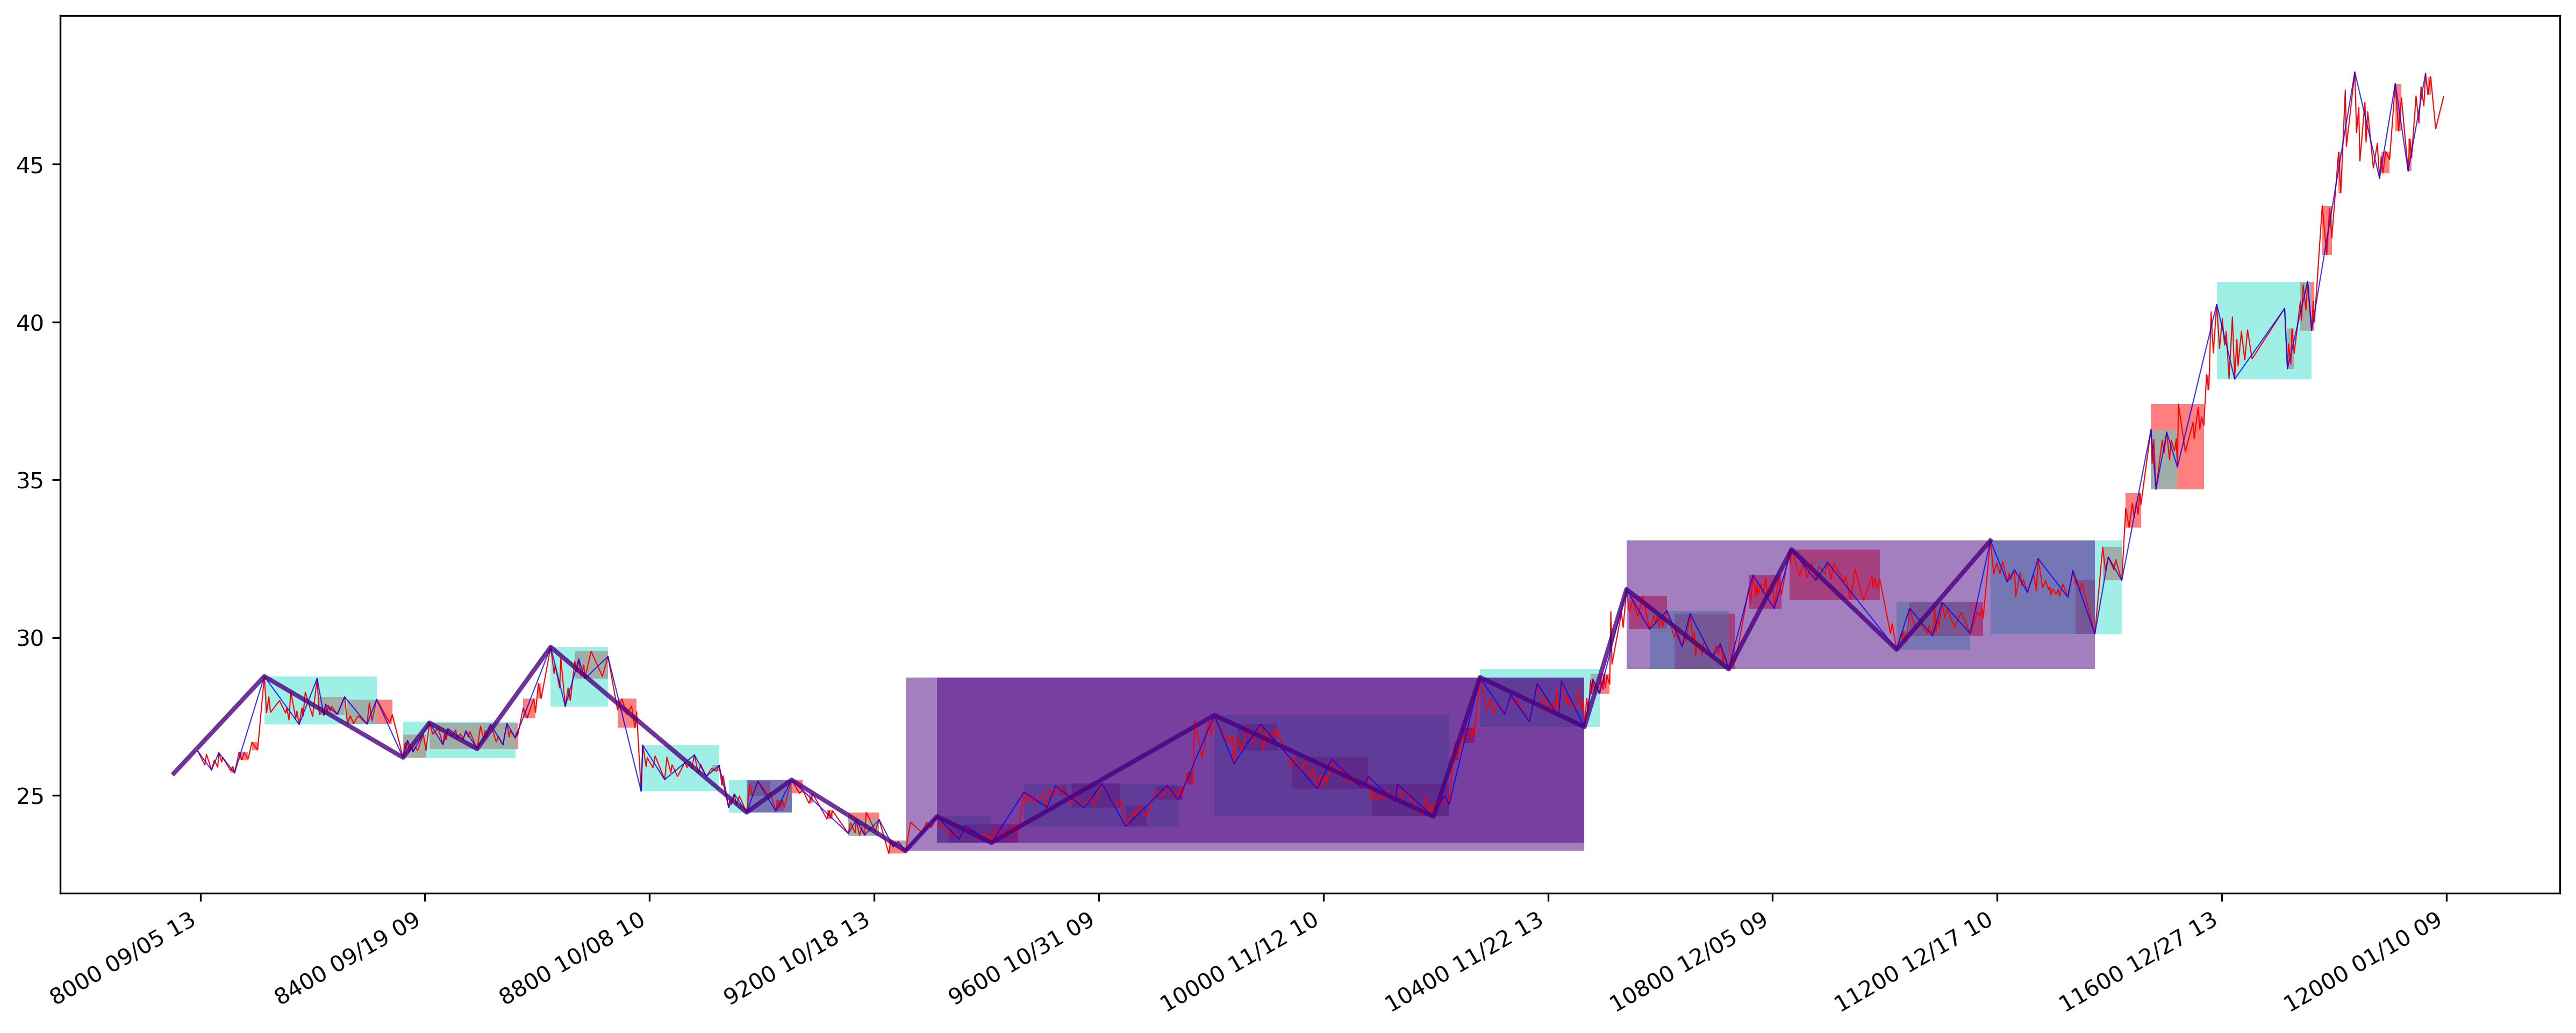

In [38]:
s_idx, e_idx = 8000,12000
# 绘制全景图
# Input: dt_df, 
#        [s_idx: e_idx], 
#       对象列表？？ 

## 拼接 x_label
dt_df['label2'] = dt_df.index
dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
dt_df.drop(['label2'],axis=1, inplace=True)

## x_label 转换函数
x_fmt = dt_df['label'].values.tolist()
def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

## 底图数据 by [s_idx: e_idx]
x = [s_idx, e_idx]
y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
print(x,y)

## draw
fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)

#=== 底图设置
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
ax.plot(x, y, alpha=0)

#=== 
Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8)
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)

center_list0 = [cc for cc in m.CLv0_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list0)
center_list1 = [cc for cc in m.CLv1_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list1, facecolor='turquoise')
center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list2,  facecolor='indigo')
'''
pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list1 = [pp for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list1, facecolor='turquoise', alpha=0.8)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=False, alpha=0.8)
'''

fig.autofmt_xdate()
plt.savefig('全景{0}_{1}.png'.format(str(int(s_idx)), str(int(e_idx))))

In [34]:
[[m.Lv2_L[cc.st_idxL[0]].start.TmIdx, cc.TmS, cc.TmE, cc.is_main,cc.L,cc.H, cc.st_idxL[-8:]] for cc in m.CLv2_L]

[[0.0, 4.0, 1046.0, 10, 19.9517, 23.5542, [2, 3, 4, 5, 6, 7, 8, 9]],
 [572.0, 632.0, 1046.0, 0, 19.9517, 23.3549, [6, 7, 8, 9, 10]],
 [632.0, 720.0, 1046.0, 0, 19.9517, 22.8797, [7, 8, 9, 10]],
 [1046.0, 0, 0, 0, 0, 0, [10]],
 [1046.0, 1244.0, 1254.0, 10, 23.7764, 24.7192, [10, 11]],
 [1254.0, 1445.0, 1548.0, 10, 25.3171, 27.1183, [12, 13]],
 [1548.0,
  1669.0,
  2937.0,
  10,
  27.264,
  33.9324,
  [15, 16, 17, 18, 19, 20, 21, 22]],
 [1669.0,
  1781.0,
  2937.0,
  0,
  27.264,
  33.9324,
  [16, 17, 18, 19, 20, 21, 22, 23]],
 [2064.0, 2346.0, 2937.0, 0, 27.264, 33.9324, [20, 21, 22, 23]],
 [2937.0, 3829.0, 6779.0, 0, 19.6451, 25.43, [36, 37, 38, 39, 40, 41, 42, 43]],
 [4182.0, 4460.0, 6779.0, 0, 19.6451, 25.43, [36, 37, 38, 39, 40, 41, 42, 43]],
 [5795.0, 6144.0, 6529.0, 10, 20.34, 21.52, [37, 38, 39, 40, 41]],
 [6529.0, 0, 0, 0, 0, 0, [42]],
 [6529.0, 6779.0, 9256.0, 0, 23.02, 29.7, [51, 52, 53, 54, 55, 56, 57, 58]],
 [8624.0, 8973.0, 9053.0, 10, 24.46, 25.49, [55, 56]],
 [9053.0, 925

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

ydata = dt_df.loc[s_stp:e_stp,'close'].values
xdata = dt_df.loc[s_stp:e_stp,'TmIdx'].values
print("s:{0},e:{1},len:{2}".format(s_idx,e_idx,len(ydata)))

# format the ticks
tmLabel = dt_df.loc[s_stp:e_stp,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in dt_df.index]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int(len(ydata)/10)))

Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b')
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2)

pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=True)
#ax.text(11442,33.93,'33.93')
ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.savefig("image01.png")
plt.show()

In [ ]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

In [ ]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)